# L'objectif est de trouver l'attriut nécessaire pour fabriquer un vin de qualité afin d'aider les producteurs à optimiser leurs efforts.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## importation des données
les variables indépendantes sont :
- fixed acidity
- volatile acidity
- citric acid
- chlorides
- free sulfur dioxyde
- total sulfur dioxyde
- density
- ph
- sulphates
- alchool
  
les variables dépandantes ou d'interet basé sur des données sensorielles est (échelle de 0 à 10) :
- quality

In [8]:
red = pd.read_csv('data/winequality-red.csv', sep=';')
white = pd.read_csv('data/winequality-white.csv', sep=';')

In [9]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [11]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [13]:
red["type_vin"] = 1
white['type_vin'] = 0

df = pd.concat([red, white])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_vin              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


## analyse exploratoire

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [16]:
df.isnull().sum(
  
)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_vin                0
dtype: int64

In [18]:
df["quality"].value_counts(normalize=True)

quality
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: proportion, dtype: float64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>,
        <Axes: title={'center': 'residual sugar'}>],
       [<Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>,
        <Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>],
       [<Axes: title={'center': 'pH'}>,
        <Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>],
       [<Axes: title={'center': 'type_vin'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

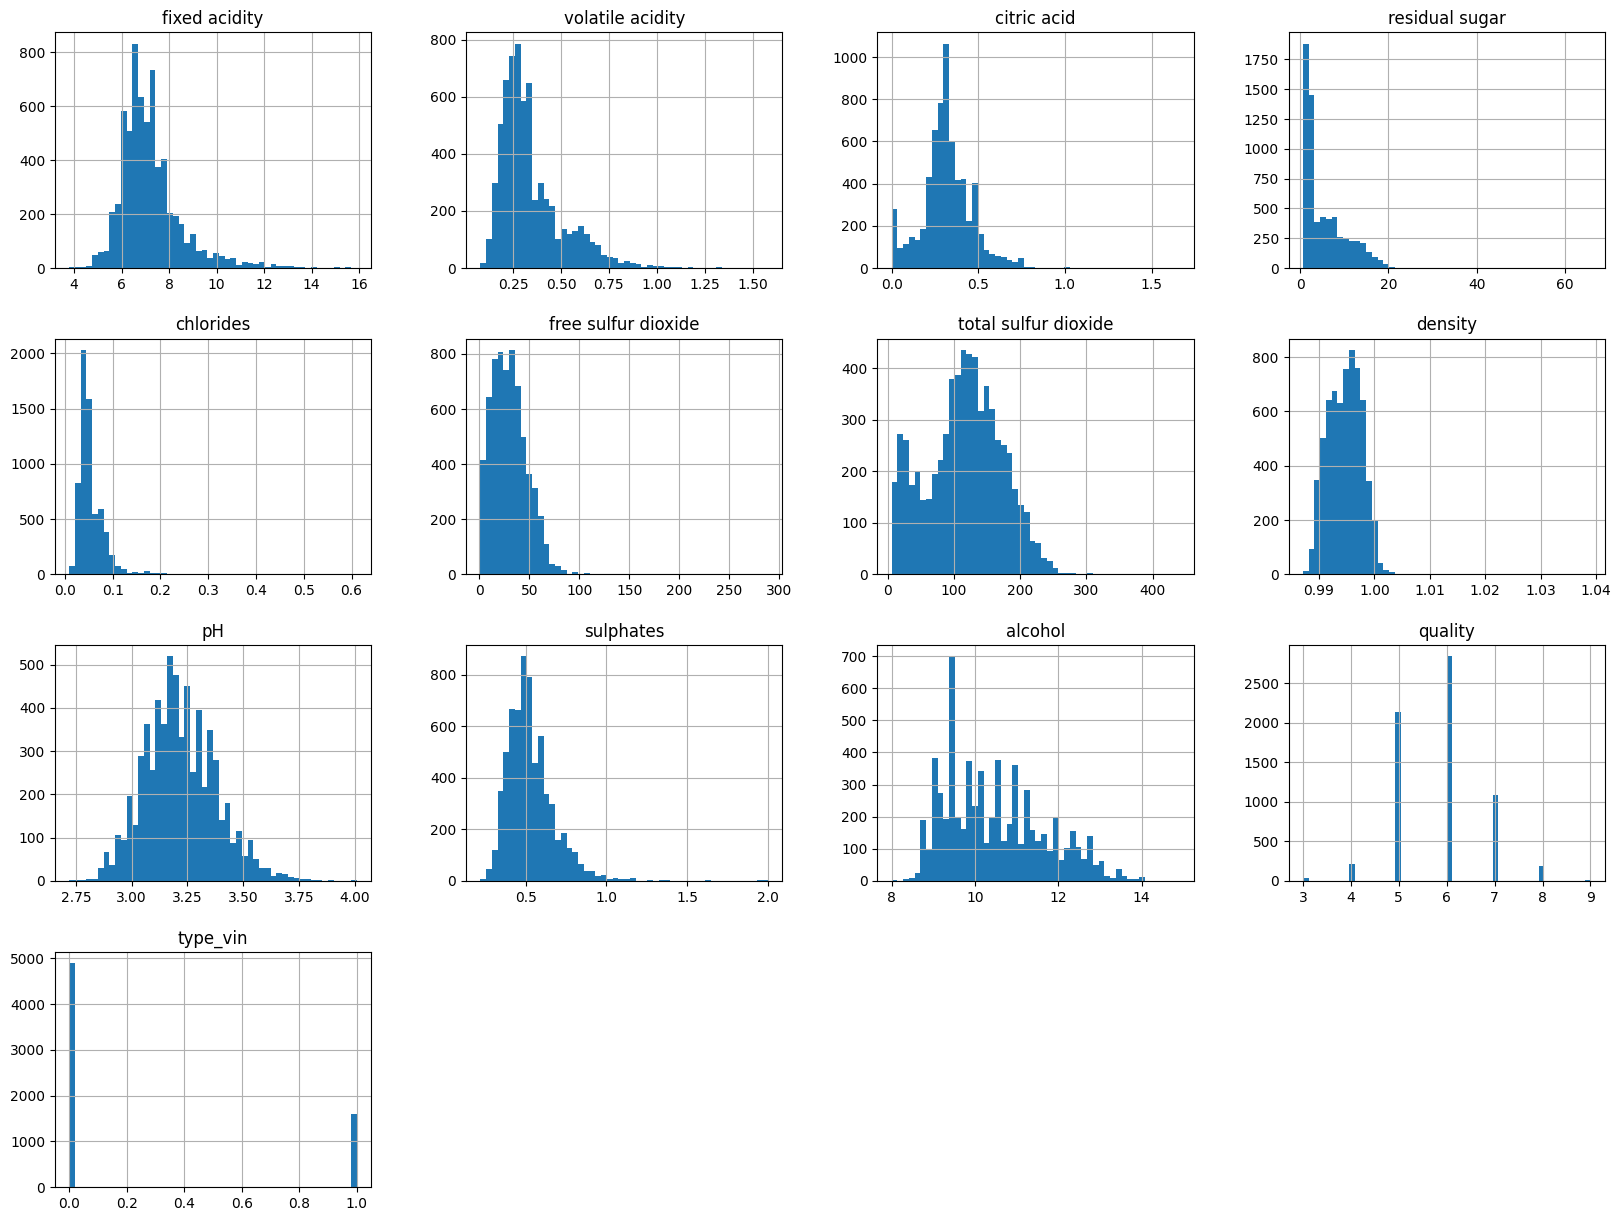

In [19]:
df.hist(bins=50, figsize=(20,15))

## Hypothèse : on peut supposer qu'un très bon vin a un score de qualité >= 7 et un vin de faible qualité a un score < 7. Dans ce cas, il serait intéressant de comparer les statistiques des variables pour ce 2 groupes de vin.

In [21]:
df[df.quality >= 7].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
count,1277.000000,1277.00000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,7.085709,0.28917,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966,0.169930
std,1.342832,0.11696,0.110040,4.063824,0.021014,15.344154,47.126201,0.003007,0.159094,0.161521,1.215620,0.376348,0.375718
min,3.900000,0.08000,0.000000,0.800000,0.012000,3.000000,7.000000,0.987110,2.840000,0.220000,8.500000,7.000000,0.000000
25%,6.300000,0.20000,0.280000,1.800000,0.033000,20.000000,87.000000,0.990720,3.120000,0.420000,10.700000,7.000000,0.000000
50%,6.900000,0.27000,0.320000,2.900000,0.039000,31.000000,114.000000,0.992280,3.220000,0.510000,11.500000,7.000000,0.000000
75%,7.400000,0.34000,0.380000,6.500000,0.051000,40.000000,140.000000,0.995000,3.340000,0.640000,12.400000,7.000000,0.000000
max,15.600000,0.91500,0.760000,19.250000,0.358000,108.000000,289.000000,1.003200,3.820000,1.360000,14.200000,9.000000,1.000000


In [23]:
df[df.quality <= 7].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
count,6299.000000,6299.000000,6299.000000,6299.000000,6299.000000,6299.000000,6299.00000,6299.000000,6299.000000,6299.000000,6299.000000,6299.000000,6299.000000
mean,7.226790,0.341190,0.318154,5.446134,0.056513,30.400222,115.69003,0.994766,3.218285,0.531896,10.454093,5.749008,0.250992
std,1.299327,0.165664,0.146449,4.775601,0.035365,17.756761,56.92701,0.002976,0.160930,0.148258,1.170431,0.792368,0.433618
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.00000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,76.00000,0.992400,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.048000,29.000000,118.00000,0.994990,3.210000,0.510000,10.200000,6.000000,0.000000
75%,7.700000,0.410000,0.390000,8.100000,0.066000,41.000000,156.00000,0.997000,3.320000,0.600000,11.200000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.00000,1.038980,4.010000,2.000000,14.900000,7.000000,1.000000


In [24]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


<Axes: >

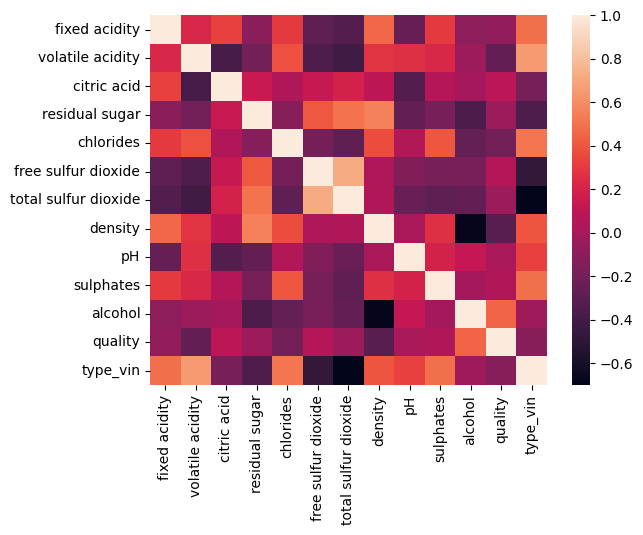

In [25]:
sns.heatmap(df.corr())

Text(0.5, 1.0, 'Coefficient de correlation de Pearson entre variables')

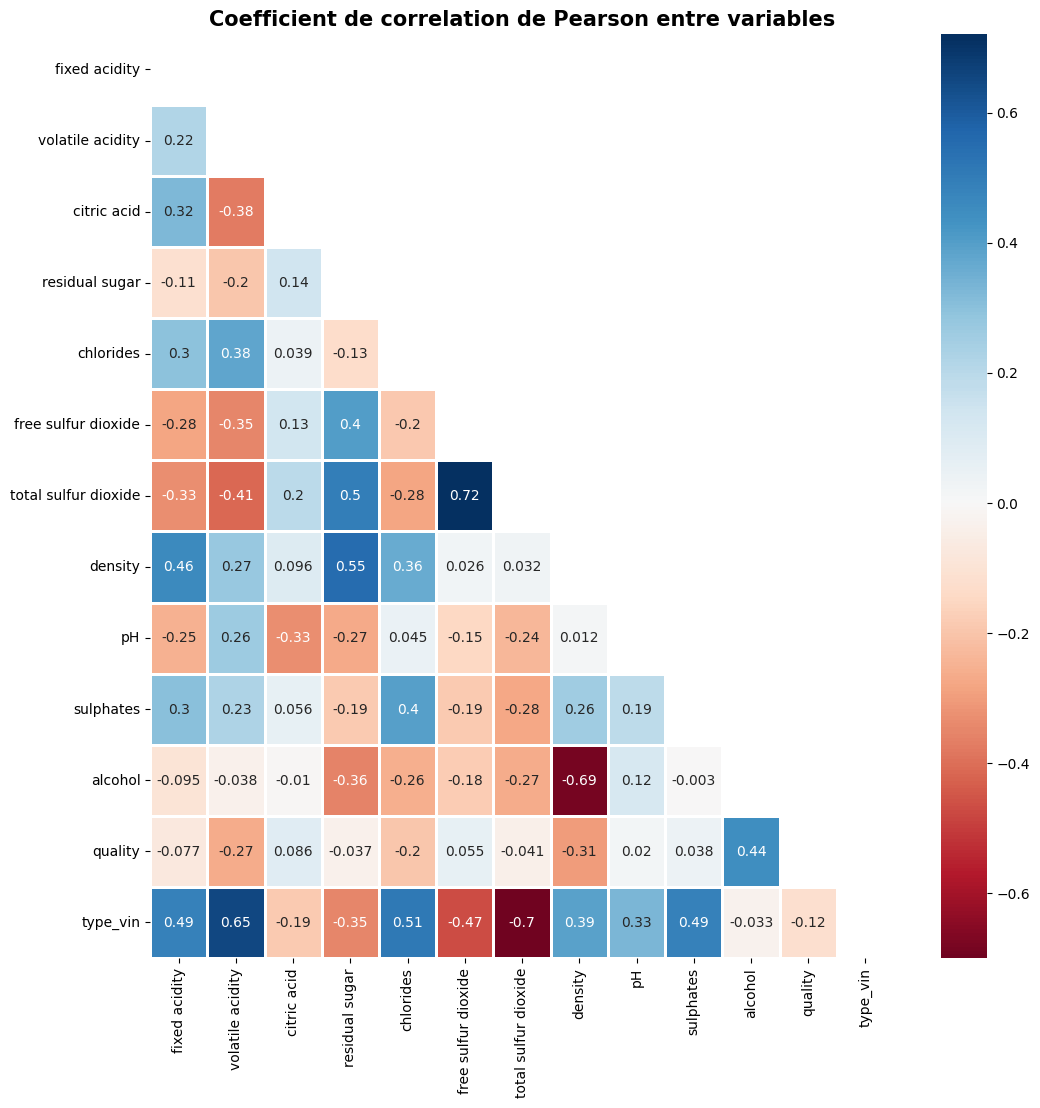

In [26]:
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, annot=True, center=0, cmap='RdBu', linewidths=1)
plt.title('Coefficient de correlation de Pearson entre variables', size=15, fontweight='bold')

# prétraitement

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop('quality', axis=1)
y = df['quality']

seed = 33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5197, 12) (1300, 12) (5197,) (1300,)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.78710119, -0.23949659, -0.2647992 , ..., -0.82055436,
         2.35652207, -0.57046226],
       [ 0.14743115, -0.48461772, -0.0563741 , ...,  0.98176496,
         0.09376408, -0.57046226],
       [ 0.06955346, -1.09742054,  0.22152603, ..., -0.15302869,
        -0.24145933, -0.57046226],
       ...,
       [-0.08620193, -0.85229941,  0.36047609, ..., -0.08627612,
         0.26137578, -0.57046226],
       [-0.7092235 ,  3.92756256, -2.14062508, ..., -0.48679152,
         0.59659919,  1.75296435],
       [ 0.30318655,  1.04738932, -0.54269933, ..., -1.62158517,
         0.26137578, -0.57046226]])

In [29]:
## choisir un algorythme le plus performant entre les 3

lr_cve = cross_val_score(LinearRegression(), X_train_scaled, y_train, cv=3, scoring='neg_root_mean_squared_error')
rf_cve = cross_val_score(RandomForestRegressor(random_state=seed), X_train_scaled, y_train, cv=3, scoring='neg_root_mean_squared_error')
svm_cve = cross_val_score(SVR(), X_train_scaled, y_train, cv=3, scoring='neg_root_mean_squared_error')

In [30]:
lr_cve

array([-0.73253584, -0.73110956, -0.72582852])

In [31]:
rf_cve

array([-0.62019518, -0.63840678, -0.6369258 ])

In [32]:
svm_cve

array([-0.67342018, -0.68137323, -0.67191659])

In [33]:
print("RF: ", rf_cve.mean(), "LR :", lr_cve.mean(), "SVM: ", svm_cve.mean())

RF:  -0.6318425906491011 LR : -0.7298246371416165 SVM:  -0.6755700011223958


l'algorythme RandomForestRegressor est le plus performant, on le choisit!

# construction du modèle

In [34]:
# on entraine le model
model = RandomForestRegressor(random_state=seed)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=33)

In [38]:
# on fait la prediction
y_pred = model.predict(X_test_scaled)
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

RMSE:  0.6307860176002635


/home/lapinragnar/mes-codes/2-prediction-de-vin-ML/venv/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
y_pred

array([6.4 , 5.82, 6.25, ..., 5.38, 5.09, 4.98])

# Conclusion

In [39]:
model.feature_importances_

array([0.05438907, 0.128995  , 0.06012551, 0.07411797, 0.06590424,
       0.08302336, 0.0727574 , 0.05769381, 0.06995162, 0.07491607,
       0.25618198, 0.00194397])

In [42]:
vars_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
vars_imp

alcohol                 0.256182
volatile acidity        0.128995
free sulfur dioxide     0.083023
sulphates               0.074916
residual sugar          0.074118
total sulfur dioxide    0.072757
pH                      0.069952
chlorides               0.065904
citric acid             0.060126
density                 0.057694
fixed acidity           0.054389
type_vin                0.001944
dtype: float64

Text(0.5, 1.0, 'importance de chaque prédicteur')

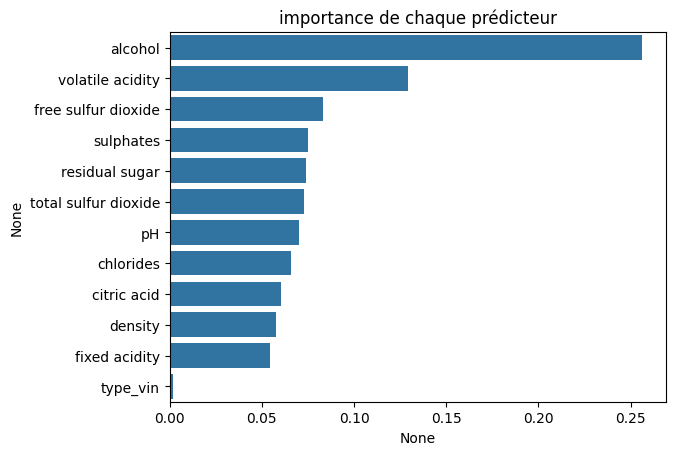

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x=vars_imp, y=vars_imp.index)
plt.title("importance de chaque prédicteur")